# Economic Freedom Data Analysis
By : Sett N. Hein

In [1]:
%pylab inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Data Manipulation 

In [2]:
df = pd.read_csv("hfi_cc_2018.csv")
df = df[df.year == 2016]
df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [3]:
# filter Columns
df_eco_free = df.filter(items=["countries", "ef_rank", 'ef_score',"hf_rank",'hf_score' ,"region", "ISO_code"])
df_eco_free.head()

,countries,ef_rank,ef_score,hf_rank,hf_score,region,ISO_code
0,Albania,34.0,7.54,48.0,7.568140,Eastern Europe,ALB
1,Algeria,159.0,4.99,155.0,5.135886,Middle East & North Africa,DZA
2,Angola,155.0,5.17,142.0,5.640662,Sub-Saharan Africa,AGO
3,Argentina,160.0,4.84,107.0,6.469848,Latin America & the Caribbean,ARG
4,Armenia,29.0,7.57,57.0,7.241402,Caucasus & Central Asia,ARM


In [4]:
#Read File on Population
population_df = pd.read_excel("Population.xls")
#Rename Columns
population_df.columns = ["countries", "population"]
population_df.head()

,countries,population
0,Aruba,0.104822
1,Afghanistan,34.656032
2,Angola,28.813463
3,Albania,2.876101
4,Andorra,0.077281


In [5]:
#Merge 2 dataframes
df_final = pd.merge(population_df, df_eco_free, on= "countries", how='right')
df_final.head()

,countries,population,ef_rank,ef_score,hf_rank,hf_score,region,ISO_code
0,Angola,28.813463,155.0,5.17,142.0,5.640662,Sub-Saharan Africa,AGO
1,Albania,2.876101,34.0,7.54,48.0,7.568140,Eastern Europe,ALB
2,United Arab Emirates,9.269612,37.0,7.50,117.0,6.286675,Middle East & North Africa,ARE
3,Argentina,43.847430,160.0,4.84,107.0,6.469848,Latin America & the Caribbean,ARG
4,Armenia,2.924816,29.0,7.57,57.0,7.241402,Caucasus & Central Asia,ARM


In [6]:
#Change the regions into Continents
df_final.region = df_final.region.replace(['Sub-Saharan Africa','Middle East & North Africa'], 'Africa')
df_final.region = df_final.region.replace(['Eastern Europe','Western Europe'], 'Europe')
df_final.region = df_final.region.replace(['South Asia','East Asia','Caucasus & Central Asia'], 'Asia')
df_final.region = df_final.region.replace(['Latin America & the Caribbean'], 'South America')

df_final.region.unique()


array(['Africa', 'Europe', 'South America', 'Asia', 'Oceania',
       'North America'], dtype=object)

# Bubble Scatter Plot

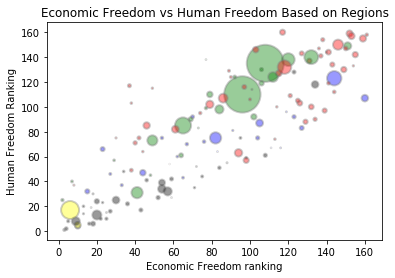

In [7]:
#Create Bubble Scatter Plot of Economic and Human Freedom based on Population & Regions
region = {'Africa':'red', 'South America':'blue', 'Asia':'green', 
          'Oceania' :'grey', "North America" : 'yellow', 'Europe': 'black'}

plt.scatter(df_final.ef_rank, df_final.hf_rank, s = df_final.population, 
            c=df_final['region'].apply(lambda x: region[x]),
            alpha=0.4, edgecolors="grey", linewidth=2)

plt.xlabel("Economic Freedom ranking")
plt.ylabel("Human Freedom Ranking")
plt.title("Economic Freedom vs Human Freedom Based on Regions")

plt.rcParams['figure.figsize'] = [11,5]


# Bar Graph

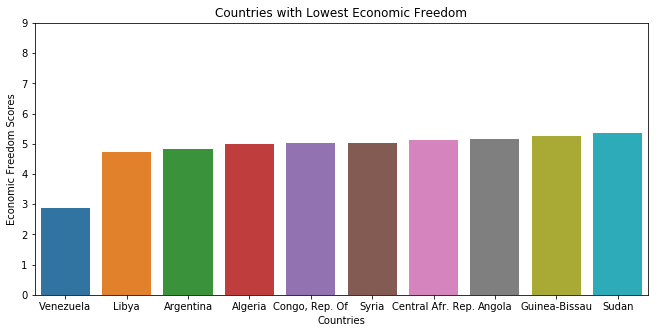

In [8]:
#Bar Graph on 10 Countries with lowest Economic Freedom
eco_lowest = df_final.nlargest(10, 'ef_rank')

sns.barplot( x = eco_lowest.countries, y = eco_lowest.ef_score)
plt.xlabel("Countries")
plt.ylabel("Economic Freedom Scores")
plt.title("Countries with Lowest Economic Freedom")
axes = plt.gca()
axes.set_ylim([0,9])

plt.rcParams['figure.figsize'] = [10, 5]

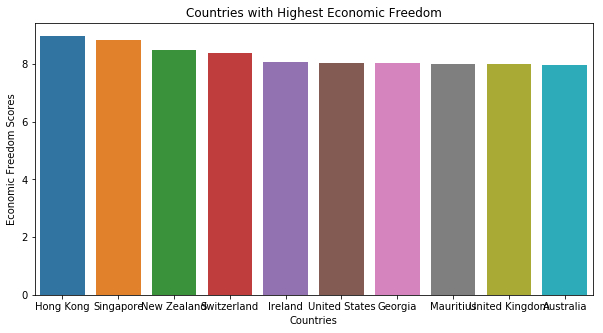

In [9]:
#Bar Graph on 10 Countries with Highest Economic Freedom
eco_highest = df_final.nsmallest(10, 'ef_rank')

sns.barplot( x = eco_highest.countries, y = eco_highest.ef_score)
plt.xlabel("Countries")
plt.ylabel("Economic Freedom Scores")
plt.title("Countries with Highest Economic Freedom")
axes.set_ylim([0,9])
plt.rcParams['figure.figsize'] = [14, 5]

# Geospatial Data Analysis

In [10]:
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [dict(
    type='choropleth',
    locations=df_final['ISO_code'],
    z=df_final['ef_score'],
    text=['countries'],
    colorscale=[[0, "rgb(10, 18, 249)"], [0.35, "rgb(10, 112, 249)"], [0.4, "rgb(18, 234, 253)"],\
                [0.6, "rgb(252, 108, 1)"], [0.7, "rgb(238, 7, 7)"], [1, "rgb(185, 7, 7)"]],
    autocolorscale=False,
    reversescale=True,
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        title='Score'),
)]

layout = dict(
    title='Economic Freedom Score<br>Source:\
            <a href="https://www.kaggle.com/gsutters/the-human-freedom-index">\
            The Human Freedom Index</a>',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig,validate=False, filename='d3-world-map')